<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-146/blob/main/Reto_entrega_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Actividad | Limpieza, análisis, visualización y kmeans

### Integrantes

Alumno: **Erick de Jesus Hernández Cerecedo**  
Matricula: **A01066428**

Alumno: **Francisco Javier Hernandez Camarillo**  
Matricula: **A00998083**

### Información del Curso

Nombre: **Ciencia y analítica de datos**  
Profesor: **María de la Paz Rico**

Fechas: **Martes 16 de noviembre de 2022**

---

In [ ]:
# Importar librerias
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from statistics import *


import geopandas as gpd
from shapely.geometry import Point

### 1. Limpieza de base de datos.

##### Lectura de datos

In [ ]:
# Lectura de datos
path = 'Datos_de_calidad_del_agua_2020\\Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
df = pd.read_csv(path, sep = ',', encoding='ISO-8859-1')

pd.set_option('display.max_columns', None)
df

CLAVE                                     SITIO  \
0          DLAGU6                              POZO SAN GIL   
1       DLAGU6516                    POZO R013 CAÑADA HONDA   
2          DLAGU7                                POZO COSIO   
3          DLAGU9                        POZO EL SALITRILLO   
4        DLBAJ107                        RANCHO EL TECOLOTE   
...           ...                                       ...   
1063  OCRBR5101M1              L-310 (COMUNIDAD SAN MANUEL)   
1064  OCRBR5102M1  L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS)   
1065  OCRBR5105M2                HACIENDA MEXIQUITO POZO 01   
1066  OCRBR5106M1                     COMUNIDAD LOS POCITOS   
1067  OCRBR5109M1                      COMUNIDAD LA REFORMA   

               ORGANISMO_DE_CUENCA               ESTADO          MUNICIPIO  \
0          LERMA SANTIAGO PACIFICO       AGUASCALIENTES           ASIENTOS   
1          LERMA SANTIAGO PACIFICO       AGUASCALIENTES     AGUASCALIENTES   
2          LERMA SANTIAGO PACIFICO       AGUASCALIENTES              COSIO   
3          LERMA SANTIAGO PACIFICO       AGUASCALIENTES    RINCON DE ROMOS   
4     PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR             LA PAZ   
...                            ...                  ...                ...   
1063                     RIO BRAVO           NUEVO LEON            LINARES   
1064                     RIO BRAVO           NUEVO LEON            LINARES   
1065                     RIO BRAVO           NUEVO LEON  CADEREYTA JIMENEZ   
1066                     RIO BRAVO           NUEVO LEON            GALEANA   
1067                     RIO BRAVO           NUEVO LEON            GALEANA   

                     ACUIFERO SUBTIPO   LONGITUD   LATITUD  PERIODO  ALC_mg/L  \
0          VALLE DE CHICALOTE    POZO -102.02210  22.20887     2020   229.990   
1          VALLE DE CHICALOTE    POZO -102.20075  21.99958     2020   231.990   
2     VALLE DE AGUASCALIENTES    POZO -102.28801  22.36685     2020   204.920   
3     VALLE DE AGUASCALIENTES    POZO -102.29449  22.18435     2020   327.000   
4                TODOS SANTOS    POZO -110.24480  23.45138     2020   309.885   
...                       ...     ...        ...       ...      ...       ...   
1063            CITRICOLA SUR    POZO  -99.54191  24.76036     2020   231.045   
1064            CITRICOLA SUR    POZO  -99.70099  24.78280     2020   256.000   
1065          CITRICOLA NORTE    POZO  -99.82249  25.55197     2020   330.690   
1066    NAVIDAD-POTOSI-RAICES    POZO -100.32683  24.80118     2020   193.140   
1067    NAVIDAD-POTOSI-RAICES    POZO -100.73302  25.09380     2020   263.070   

     CALIDAD_ALC  CONDUCT_mS/cm         CALIDAD_CONDUC  SDT_mg/L SDT_M_mg/L  \
0           Alta          940.0  Permisible para riego       NaN      603.6   
1           Alta          608.0       Buena para riego       NaN      445.4   
2           Alta          532.0       Buena para riego       NaN        342   
3           Alta          686.0       Buena para riego       NaN      478.6   
4           Alta         1841.0  Permisible para riego       NaN       1179   
...          ...            ...                    ...       ...        ...   
1063        Alta         2350.0      Dudosa para riego       NaN     1545.8   
1064        Alta          529.0       Buena para riego       NaN        297   
1065        Alta         2600.0      Dudosa para riego       NaN       1873   
1066        Alta          873.0  Permisible para riego       NaN   690.6667   
1067        Alta          817.0  Permisible para riego       NaN        495   

                    CALIDAD_SDT_ra     CALIDAD_SDT_salin FLUORUROS_mg/L  \
0               Cultivos sensibles       Potable - Dulce         0.9766   
1             Excelente para riego       Potable - Dulce         0.9298   
2             Excelente para riego       Potable - Dulce         1.8045   
3             Excelente para riego       Potable - Dulce         1.1229   
4     Cultivos con ma

In [ ]:
# Lectura de datos
path = 'Datos_de_calidad_del_agua_2020\\Escalas_subterranea.csv'
df_escalas = pd.read_csv(path, sep = ',', encoding='ISO-8859-1')

#pd.set_option('display.max_columns', 10)
df_escalas.head(10)

CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas  \
0                                          Excelente      
1                                      Buena calidad      
2                                          Aceptable      
3                                        Contaminada      
4                            Fuertemente contaminada      
5  CALIDAD DEL AGUA PARA SOLIDOS DISUELTOS TOTALE...      
6                                    Potable - Dulce      
7                               Ligeramente salobres      
8                                           Salobres      
9                                            Salinas      

                                            CRITERIO  \
0                               COLI_FEC menor a 1.1   
1  COLI_FEC mayor o igual de 1.1 y menor o igual ...   
2       COLI_FEC mayor de 200 y menor o igual a 1000   
3     COLI_FEC mayor de 1000 y menor o igual a 10000   
4                            COLI_FEC mayor de 10000   
5                                           CRITERIO   
6                           SDT menor o igual a 1000   
7           SDT mayor de 1000 y menor o igual a 2000   
8          SDT mayor de 2000 y menor o igual a 10000   
9                                 SDT mayor de 10000   

                                         DESCRIPCION  
0  Agua potable. Agua no contaminada o condicion ...  
1  Aguas para uso recreativo con contacto primari...  
2  Aguas con calidad admisible como fuente de aba...  
3  Aguas  con contaminacion bacteriologica. Indic...  
4  Aguas con fuerte contaminacion bacteriologica....  
5                                        DESCRIPCION  
6                           Agua Potable. Agua Dulce  
7      Aguas subterranea con bajo contenido de sales  
8      Aguas subterranea con alto contenido de sales  
9  Aguas subterranea con muy alto contenido de sales

In [ ]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

##### Detección de datos nulos

In [ ]:
# Lista de la cantidad de datos faltantes por columna
df.isna().sum()

# Columnas con datos null: ALC_mg/L, CALIDAD_ALC, CONDUCT_mS/cm, CALIDAD_CONDUC, SDT_mg/L, SDT_M_mg/L, CALIDAD_SDT_ra, CALIDAD_SDT_salin, DUR_mg/L, CALIDAD_DUR, N_NO3_mg/L, CALIDAD_N_NO3, CONTAMINANTES.

# Las columnas **SDT_mg/L** y **CONTAMINANTES** tienen un gran nuemero de datos vacios,  1068 y 434 datos NaN.
# Las demas filas contienen pocos datos null por columna, en este caso buscaremos la estrategia adecuada para reemplazar esta informacion.

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

##### Reemplazar datos

In [ ]:
# Remover columnas SDT_mg/L y CONTAMINANTES
df.drop('SDT_mg/L', inplace=True, axis=1)
df.drop('CONTAMINANTES', inplace=True, axis=1)

# La columna SDT_mg/L tiene 1068 datos nulos.
# La columna CONTAMINANTES tiene 434 datos nulos.

In [ ]:
# Reemplazar o eliminar filas con NaN en columnas numericas
df.dropna(subset=['ALC_mg/L'], axis=0, inplace=True)
df.dropna(subset=['CONDUCT_mS/cm'], axis=0, inplace=True)
df.dropna(subset=['SDT_M_mg/L'], axis=0, inplace=True)
df.dropna(subset=['DUR_mg/L'], axis=0, inplace=True)
df.dropna(subset=['N_NO3_mg/L'], axis=0, inplace=True)

# Solo basta con eliminar las categoricas ya que la otra variable es dependiente
# Num: ALC_mg/L,    CONDUCT_mS/cm,  SDT_M_mg/L,        DUR_mg/L,    N_NO3_mg/L,   
# Cat: CALIDAD_ALC, CALIDAD_CONDUC, CALIDAD_SDT_salin, CALIDAD_DUR, CALIDAD_N_NO3,

In [ ]:
# Validando de nuevo si existen nullos en las columnas
df.isna().values.any()

False

##### Cambio de tipo de dato

In [ ]:
# Clasificacion de las variables por tipo de dato
variables_string = ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO']
variables_categoricas = ['SUBTIPO', 'CALIDAD_ALC', 'CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'CALIDAD_FLUO', 'CALIDAD_DUR', 'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3', 'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_FE', 'CALIDAD_MN', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE', 'SEMAFORO']
variables_float = ['ALC_mg/L','CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']

# Cambio de tipo de dato
# Strings
df[variables_string] = df[variables_string].astype(str)
# Categorias
df[variables_categoricas] = df[variables_categoricas].astype('category')
# Float
df[variables_float] = df[variables_float].replace(['<','>'], '', regex=True)
df[variables_float] = df[variables_float].astype('float64')

# Binarias
# df['CUMPLE_CON_ALC',   
#   'CUMPLE_CON_COND',       
#   'CUMPLE_CON_SDT_ra',   
#   'CUMPLE_CON_SDT_salin',  
#   'CUMPLE_CON_FLUO',  
#   'CUMPLE_CON_DUR',    
#   'CUMPLE_CON_CF',     
#   'CUMPLE_CON_NO3',        
#   'CUMPLE_CON_AS',     
#   'CUMPLE_CON_CD',       
#   'CUMPLE_CON_CR',       
#   'CUMPLE_CON_HG',       
#   'CUMPLE_CON_PB',       
#   'CUMPLE_CON_MN',       
#   'CUMPLE_CON_FE'].astype('')



In [ ]:
# Validando los tipos de dato nuevos
df.dtypes

CLAVE                     object
SITIO                     object
ORGANISMO_DE_CUENCA       object
ESTADO                    object
MUNICIPIO                 object
ACUIFERO                  object
SUBTIPO                 category
LONGITUD                 float64
LATITUD                  float64
PERIODO                    int64
ALC_mg/L                 float64
CALIDAD_ALC             category
CONDUCT_mS/cm            float64
CALIDAD_CONDUC          category
SDT_M_mg/L               float64
CALIDAD_SDT_ra          category
CALIDAD_SDT_salin       category
FLUORUROS_mg/L           float64
CALIDAD_FLUO            category
DUR_mg/L                 float64
CALIDAD_DUR             category
COLI_FEC_NMP/100_mL      float64
CALIDAD_COLI_FEC        category
N_NO3_mg/L               float64
CALIDAD_N_NO3           category
AS_TOT_mg/L              float64
CALIDAD_AS              category
CD_TOT_mg/L              float64
CALIDAD_CD              category
CR_TOT_mg/L              float64
CALIDAD_CR

##### Aplicacion de encoder a variables categoricas y escalador de valores a las numericas

In [ ]:
# Cambiando categorias por numeros con LabelEncoder()
LE = LabelEncoder()
for variable in variables_categoricas:
    df[variable] = LE.fit_transform(df[variable])

# Aplicacndo standard scaler
SS = StandardScaler()
df[variables_float] = SS.fit_transform(df[variables_float])

df.head()

CLAVE                   SITIO           ORGANISMO_DE_CUENCA  \
0     DLAGU6            POZO SAN GIL       LERMA SANTIAGO PACIFICO   
1  DLAGU6516  POZO R013 CAÑADA HONDA       LERMA SANTIAGO PACIFICO   
2     DLAGU7              POZO COSIO       LERMA SANTIAGO PACIFICO   
3     DLAGU9      POZO EL SALITRILLO       LERMA SANTIAGO PACIFICO   
4   DLBAJ107      RANCHO EL TECOLOTE  PENINSULA DE BAJA CALIFORNIA   

                ESTADO        MUNICIPIO                 ACUIFERO  SUBTIPO  \
0       AGUASCALIENTES         ASIENTOS       VALLE DE CHICALOTE        5   
1       AGUASCALIENTES   AGUASCALIENTES       VALLE DE CHICALOTE        5   
2       AGUASCALIENTES            COSIO  VALLE DE AGUASCALIENTES        5   
3       AGUASCALIENTES  RINCON DE ROMOS  VALLE DE AGUASCALIENTES        5   
4  BAJA CALIFORNIA SUR           LA PAZ             TODOS SANTOS        5   

    LONGITUD   LATITUD  PERIODO  ALC_mg/L  CALIDAD_ALC  CONDUCT_mS/cm  \
0 -102.02210  22.20887     2020 -0.042353            0      -0.162389   
1 -102.20075  21.99958     2020 -0.024351            0      -0.428330   
2 -102.28801  22.36685     2020 -0.268016            0      -0.489208   
3 -102.29449  22.18435     2020  0.830862            0      -0.365850   
4 -110.24480  23.45138     2020  0.676805            0       0.559336   

   CALIDAD_CONDUC  SDT_M_mg/L  CALIDAD_SDT_ra  CALIDAD_SDT_salin  \
0               4   -0.106114               1                  1   
1               0   -0.163340               3                  1   
2               0   -0.200744               3                  1   
3               0   -0.151331               3                  1   
4               4    0.102029               0                  0   

   FLUORUROS_mg/L  CALIDAD_FLUO  DUR_mg/L  CALIDAD_DUR  COLI_FEC_NMP/100_mL  \
0       -0.052814             3 -0.377400            1            -0.173696   
1       -0.077060             3 -0.456894            1            -0.173696   
2        0.376085             0 -0.635204            1            -0.173696   
3        0.022977             3 -0.415796            1            -0.173696   
4       -0.437369             1  0.352266            1            -0.033290   

   CALIDAD_COLI_FEC  N_NO3_mg/L  CALIDAD_N_NO3  AS_TOT_mg/L  CALIDAD_AS  \
0                 4   -0.016359              2    -0.097151           0   
1                 4    0.170575              1    -0.174219           0   
2                 4   -0.342934              2     0.499410           1   
3                 4   -0.365766              2    -0.117132           0   
4                 0    1.355400              0    -0.271267           2   

   CD_TOT_mg/L  CALIDAD_CD  CR_TOT_mg/L  CALIDAD_CR  HG_TOT_mg/L  CALIDAD_HG  \
0    -0.033439           1    -0.053771           1     -0.12187           1   
1    -0.033439           1    -0.053771           1     -0.12187           1   
2    -0.033439           1    -0.053771           1     -0.12187           1   
3    -0.033439           1    -0.053771           1     -0.12187           1   
4    -0.033439           1    -0.053771           1     -0.12187           1   

   PB_TOT_mg/L  CALIDAD_PB  MN_TOT_mg/L  CALIDAD_MN  FE_TOT_mg/L  CALIDAD_FE  \
0    -0.087139           1    -0.188709           0    -0.057996           0   
1    -0.087139           1    -0.188709           0    -0.069501           0   
2    -0.087139           1    -0.188709           0    -0.069501           0   
3    -0.087139           1    -0.188709           0    -0.069501           0   
4    -0.087139           1    -0.188709           0    -0.069501           0   

   SEMAFORO  CUMPLE_CON_ALC  CUMPLE_CON_COND  CUMPLE_CON_SDT_ra  \
0         2               1                1                  1   
1         2               1                1                  1   
2         1               1                1                  1   
3         2               1                1                  1   
4         1               1                1        

### 2. Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
* Identificando tendencias centrales promedio, media y mediana de los datos. 
* Identificar medidas de dispersión, máximo, mínimo .
* Identificar medidas de posición no centrales , los cuartiles , outliers.   
* Identificar correlaciones.
* Preparar los datos 

In [ ]:
# Identificar tendencias y medidas como: promedio, media, mediana, cuartiles, outliers y dispersion
df.describe()

SUBTIPO     LONGITUD      LATITUD  PERIODO      ALC_mg/L  \
count  1054.000000  1054.000000  1054.000000   1054.0  1.054000e+03   
mean      4.945920  -101.848270    23.161796   2020.0  5.730183e-17   
std       0.437898     6.697568     3.875005      0.0  1.000475e+00   
min       0.000000  -116.664250    14.561150   2020.0 -1.872767e+00   
25%       5.000000  -105.385170    20.224857   2020.0 -6.340312e-01   
50%       5.000000  -102.170665    22.640705   2020.0 -1.698569e-01   
75%       5.000000   -98.971268    25.508770   2020.0  5.241881e-01   
max       7.000000   -86.864120    32.677713   2020.0  1.273958e+01   

       CALIDAD_ALC  CONDUCT_mS/cm  CALIDAD_CONDUC    SDT_M_mg/L  \
count  1054.000000   1.054000e+03     1054.000000  1.054000e+03   
mean      0.653700  -1.921297e-16        2.035104 -1.685348e-17   
std       1.176132   1.000475e+00        1.866814  1.000475e+00   
min       0.000000  -8.272414e-01        0.000000 -2.878500e-01   
25%       0.000000  -5.100348e-01        0.000000 -2.021728e-01   
50%       0.000000  -2.585125e-01        2.000000 -1.249964e-01   
75%       0.750000   1.484090e-01        4.000000  6.747900e-03   
max       3.000000   1.396532e+01        4.000000  2.939940e+01   

       CALIDAD_SDT_ra  CALIDAD_SDT_salin  FLUORUROS_mg/L  CALIDAD_FLUO  \
count     1054.000000        1054.000000    1.054000e+03   1054.000000   
mean         1.850095           0.980076   -6.741392e-17      1.448767   
std          1.178437           0.637973    1.000475e+00      1.017759   
min          0.000000           0.000000   -4.551379e-01      0.000000   
25%          1.000000           1.000000   -4.191459e-01      1.000000   
50%          2.000000           1.000000   -2.961202e-01      1.000000   
75%          3.000000           1.000000    3.307950e-02      2.000000   
max          4.000000           3.000000    1.747136e+01      3.000000   

           DUR_mg/L  CALIDAD_DUR  COLI_FEC_NMP/100_mL  CALIDAD_COLI_FEC  \
count  1.054000e+03  1054.000000         1.054000e+03       1054.000000   
mean  -1.483106e-16     1.117647        -6.741392e-18          3.091082   
std    1.000475e+00     0.840235         1.000475e+00          1.417988   
min   -9.143674e-01     0.000000        -1.736958e-01          0.000000   
25%   -6.330062e-01     1.000000        -1.736958e-01          2.000000   
50%   -2.879777e-01     1.000000        -1.736958e-01          4.000000   
75%    2.930346e-01     1.000000        -1.690221e-01          4.000000   
max    9.592310e+00     3.000000         1.154452e+01          4.000000   

         N_NO3_mg/L  CALIDAD_N_NO3   AS_TOT_mg/L   CALIDAD_AS   CD_TOT_mg/L  \
count  1.054000e+03    1054.000000  1.054000e+03  1054.000000  1.054000e+03   
mean   6.741392e-18       1.664137 -1.280865e-16     1.646110 -3.168454e-16   
std    1.000475e+00       0.612550  1.000475e+00     0.681459  1.000475e+00   
min   -5.136695e-01       0.000000 -2.712672e-01     0.000000 -3.343882e-02   
25%   -4.382408e-01       1.000000 -2.712672e-01     2.000000 -3.343882e-02   
50%   -2.673322e-01       2.000000 -2.712672e-01     2.000000 -3.343882e-02   
75%    1.037374e-01       2.000000 -2.712672e-01     2.000000 -3.343882e-02   
max    1.393375e+01       2.000000  1.235071e+01     2.000000  3.232128e+01   

        CALIDAD_CD   CR_TOT_mg/L   CALIDAD_CR   HG_TOT_mg/L   CALIDAD_HG  \
count  1054.000000  1.054000e+03  1054.000000  1.054000e+03  1054.000000   
mean      0.998102 -8.426740e-18     0.985769 -1.314571e-16     0.999051   
std       0.043540  1.000475e+00     0.118500  1.000475e+00     0.030802   
min       0.000000 -5.377118e-02     0.000000 -1.218703e-01     0.000000   
25%       1.000000 -5.377118e-02     1.000000 -1.218703e-01     1.000000   
50%       1.000000 -5.377118e-02     1.000000 -1.218703e-01     1.000000   
75%       1.000000 -5.377118e-02     1.000000 -1.218703e-01     1.000000   
max       1.000000  3.212253e+01     1.000000  2.895058e+01     1.000000   

        PB_TOT_mg/L   CALID

In [ ]:
# Mean o promedio para las variables numericas
df.mean(numeric_only=True)

SUBTIPO                 4.945920e+00
LONGITUD               -1.018483e+02
LATITUD                 2.316180e+01
PERIODO                 2.020000e+03
ALC_mg/L                5.730183e-17
CALIDAD_ALC             6.537002e-01
CONDUCT_mS/cm          -1.921297e-16
CALIDAD_CONDUC          2.035104e+00
SDT_M_mg/L             -1.685348e-17
CALIDAD_SDT_ra          1.850095e+00
CALIDAD_SDT_salin       9.800759e-01
FLUORUROS_mg/L         -6.741392e-17
CALIDAD_FLUO            1.448767e+00
DUR_mg/L               -1.483106e-16
CALIDAD_DUR             1.117647e+00
COLI_FEC_NMP/100_mL    -6.741392e-18
CALIDAD_COLI_FEC        3.091082e+00
N_NO3_mg/L              6.741392e-18
CALIDAD_N_NO3           1.664137e+00
AS_TOT_mg/L            -1.280865e-16
CALIDAD_AS              1.646110e+00
CD_TOT_mg/L            -3.168454e-16
CALIDAD_CD              9.981025e-01
CR_TOT_mg/L            -8.426740e-18
CALIDAD_CR              9.857685e-01
HG_TOT_mg/L            -1.314571e-16
CALIDAD_HG              9.990512e-01
P

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F365631C8>,
      dtype=object)

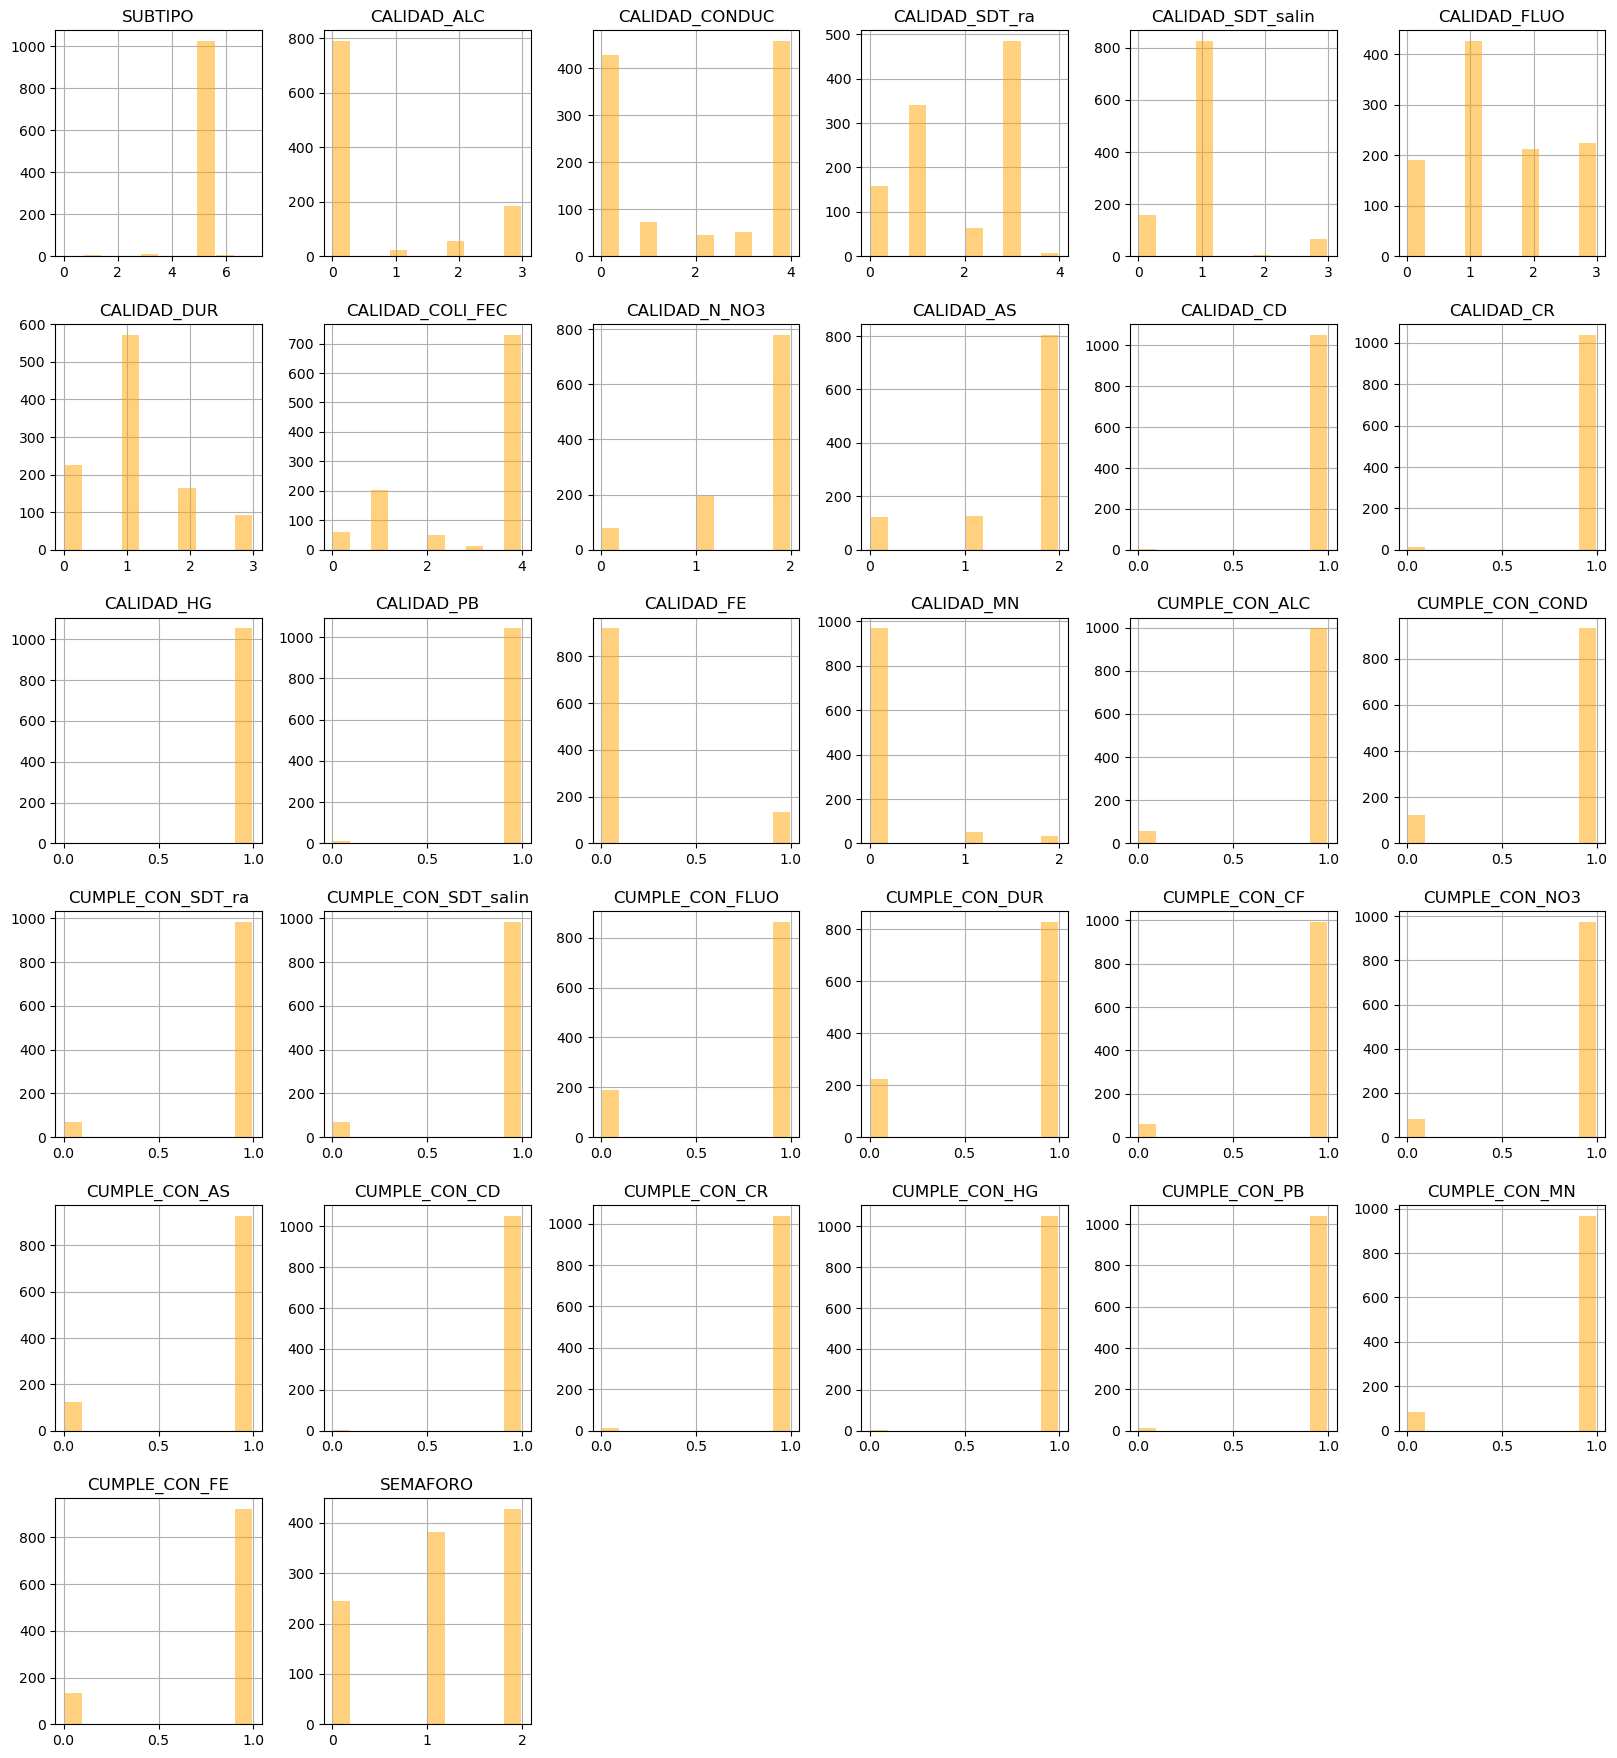

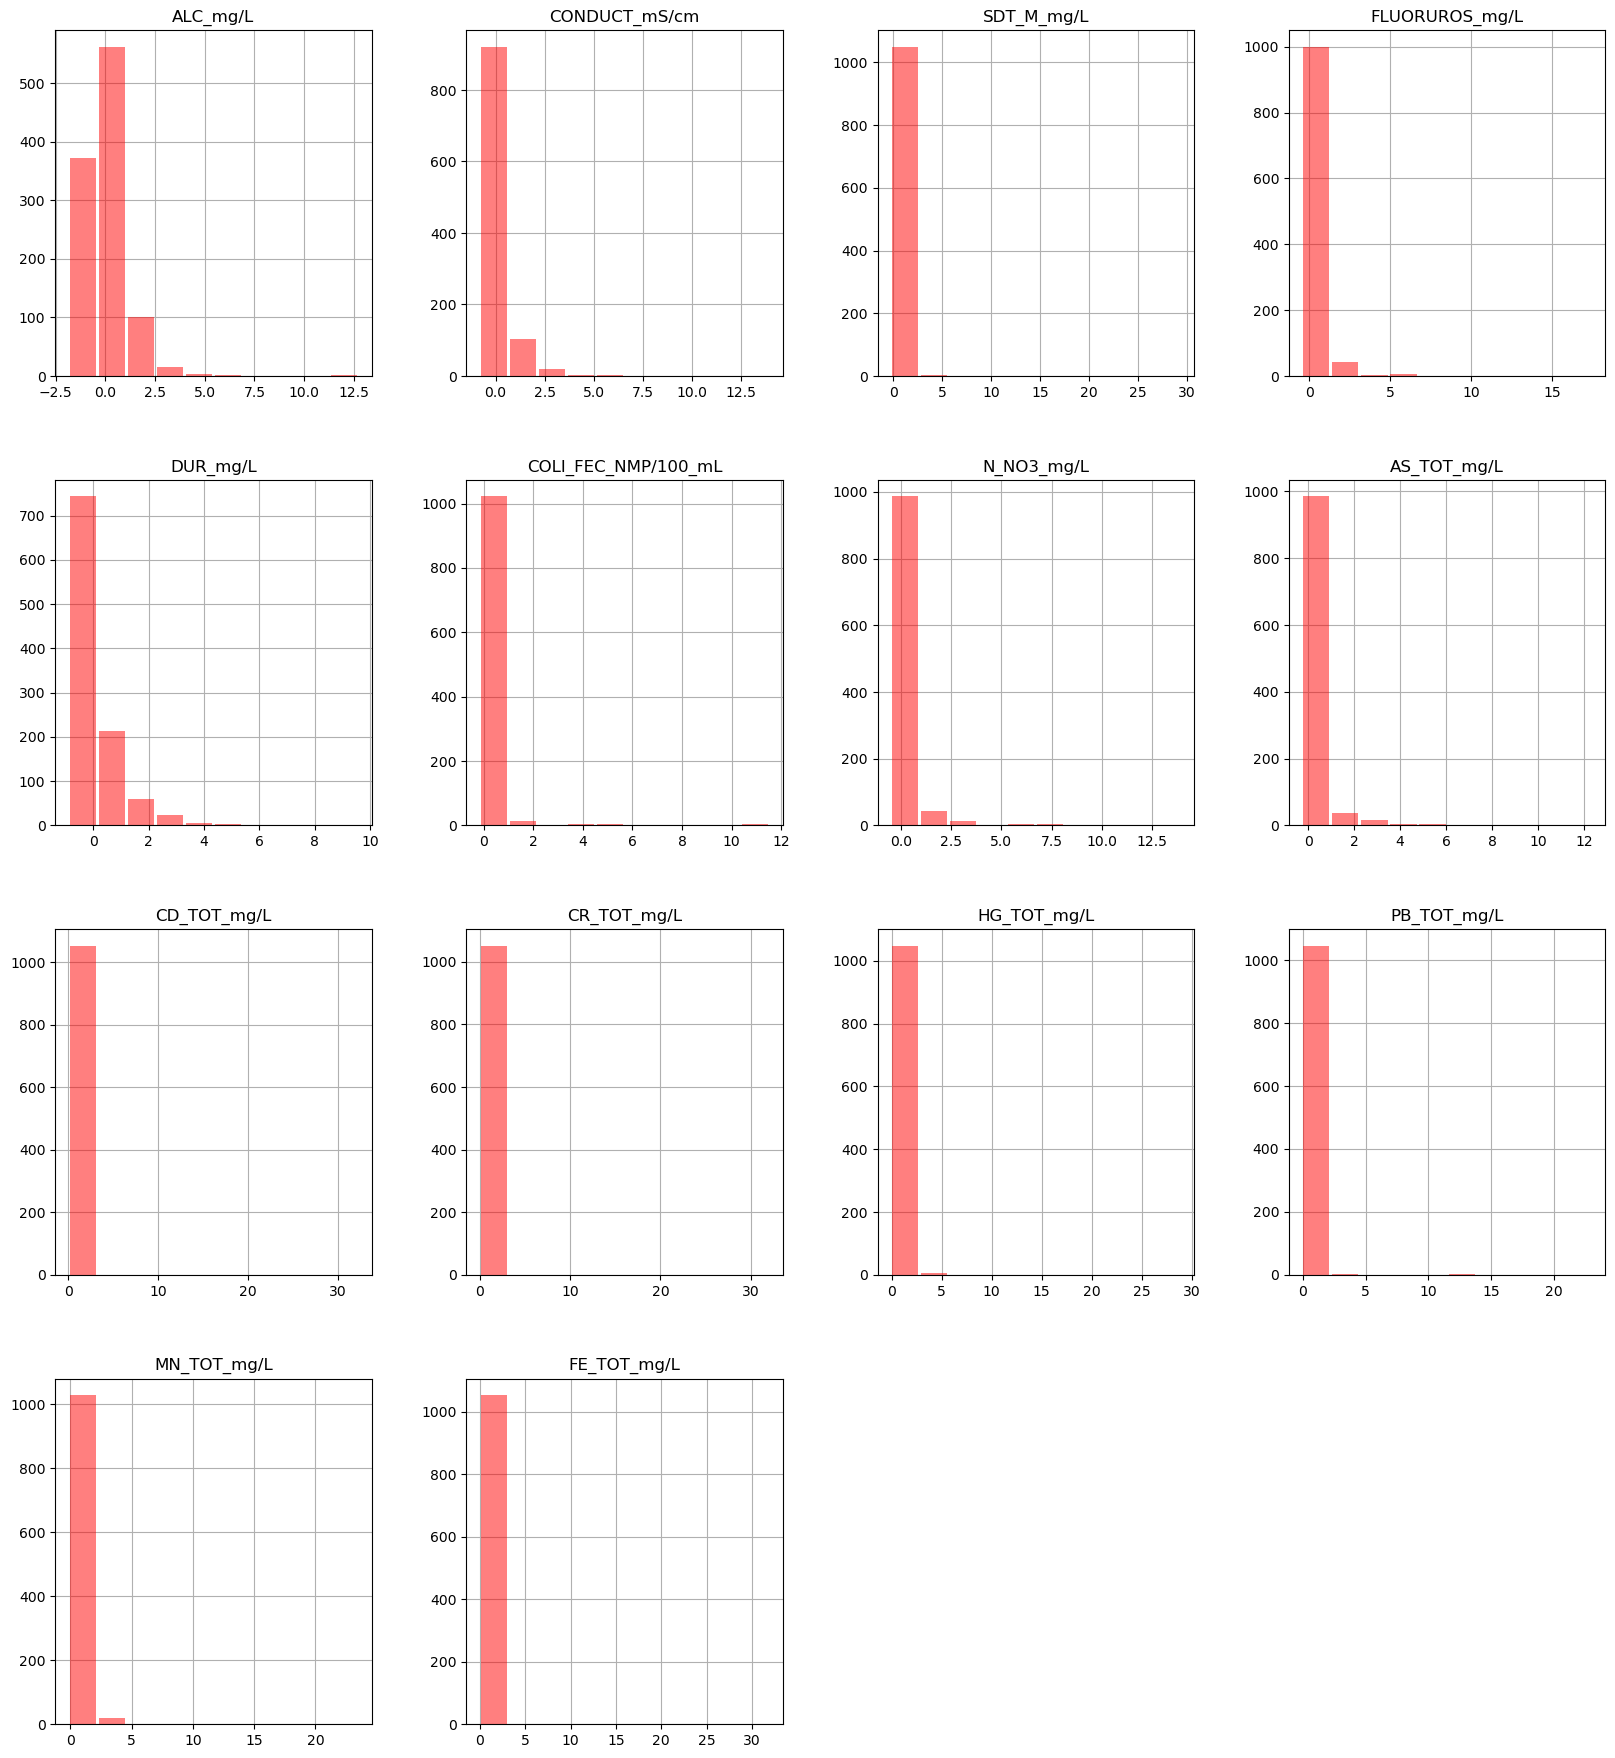

In [ ]:
df.hist(column=variables_categoricas, figsize=[20, 22], alpha=0.5, color='orange', zorder=2, rwidth=0.9)

df.hist(column=variables_float, figsize=[20, 22], alpha=0.5, color='red', zorder=2, rwidth=0.9)

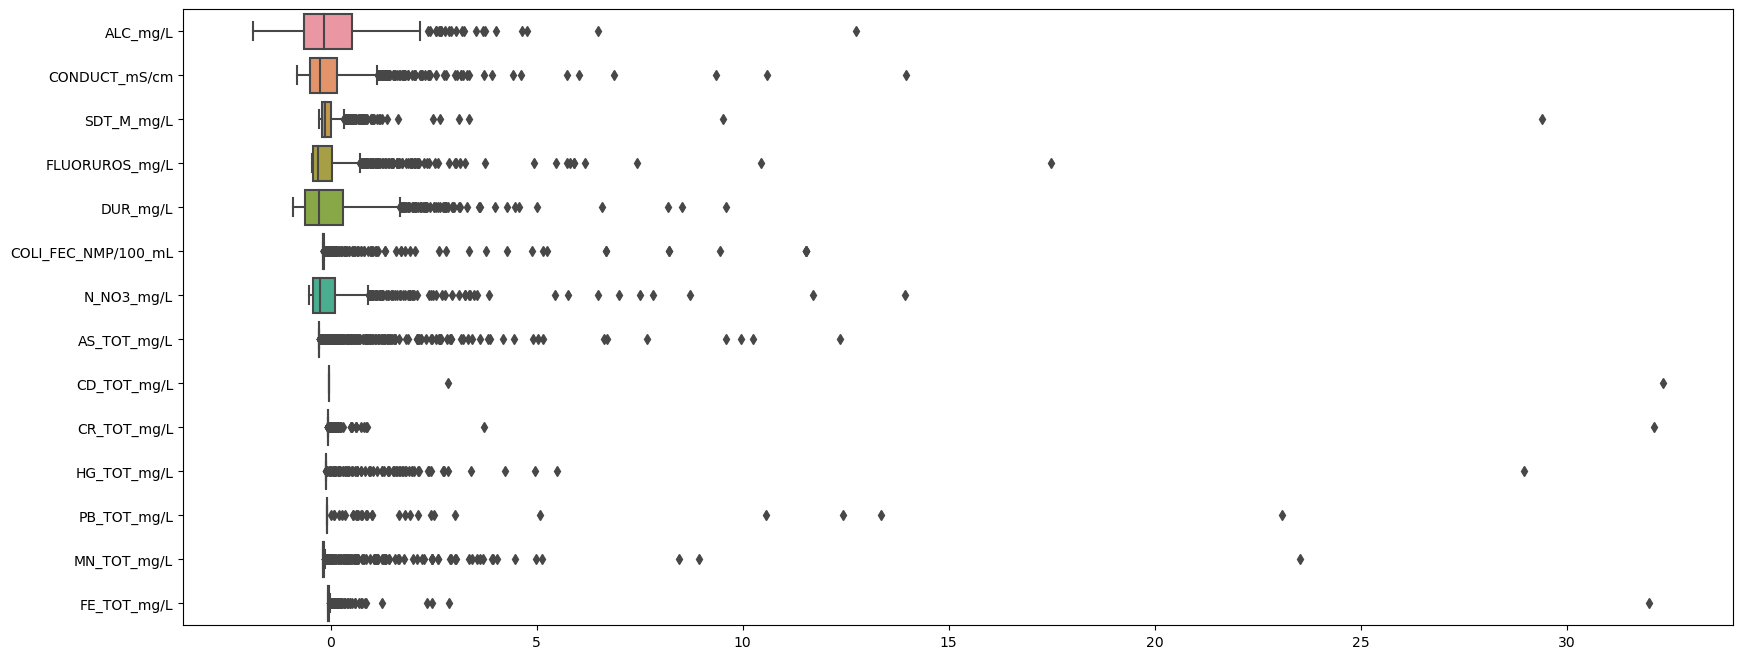

In [ ]:
# Graficas de bigotes de variables numericas
plt.figure(figsize =(20, 8))
sns.boxplot(data=df[variables_float], orient="h", dodge=False)

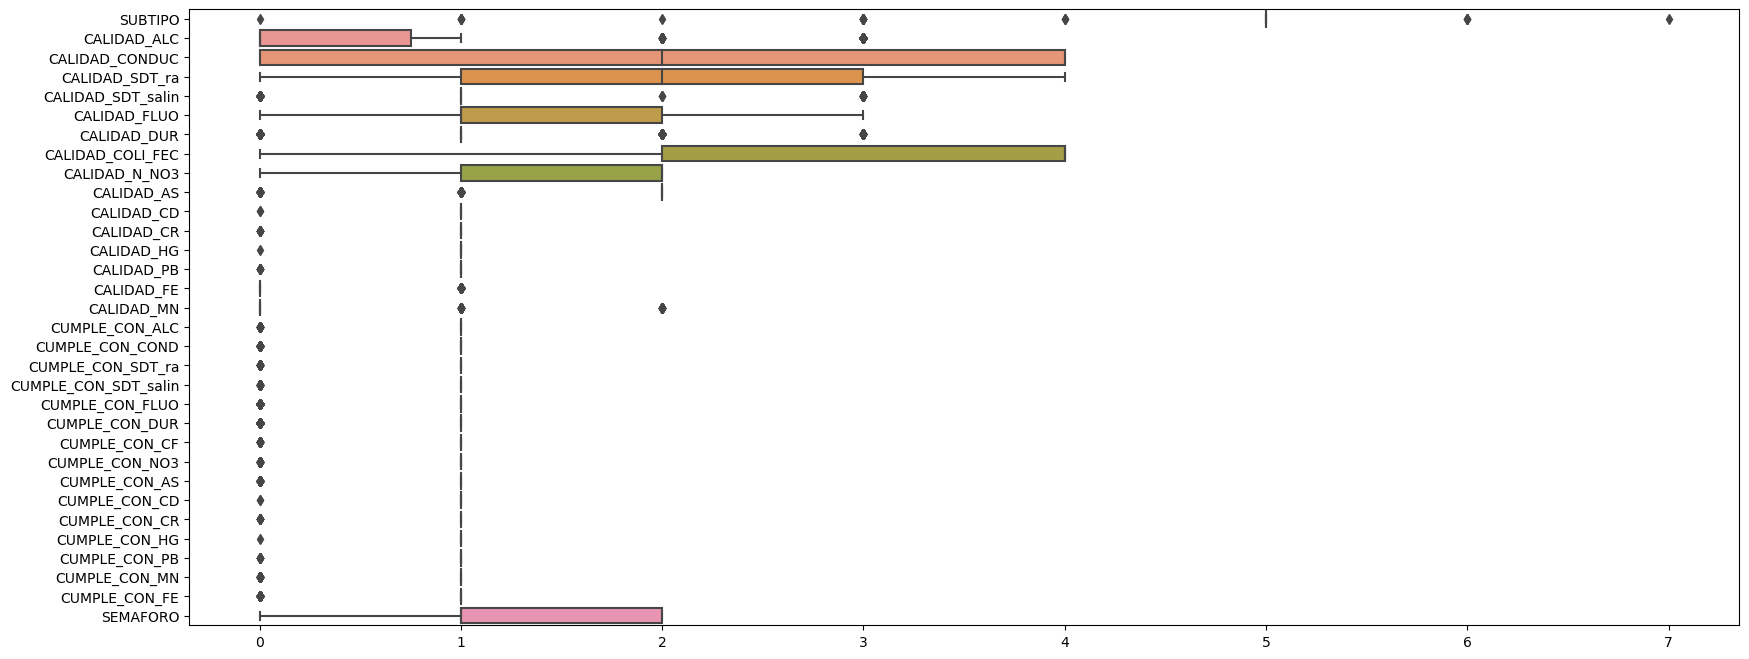

In [ ]:
# Graficas de bigotes de variables categoricas
plt.figure(figsize =(20, 8))
sns.boxplot(data=df[variables_categoricas], orient="h", dodge=False)

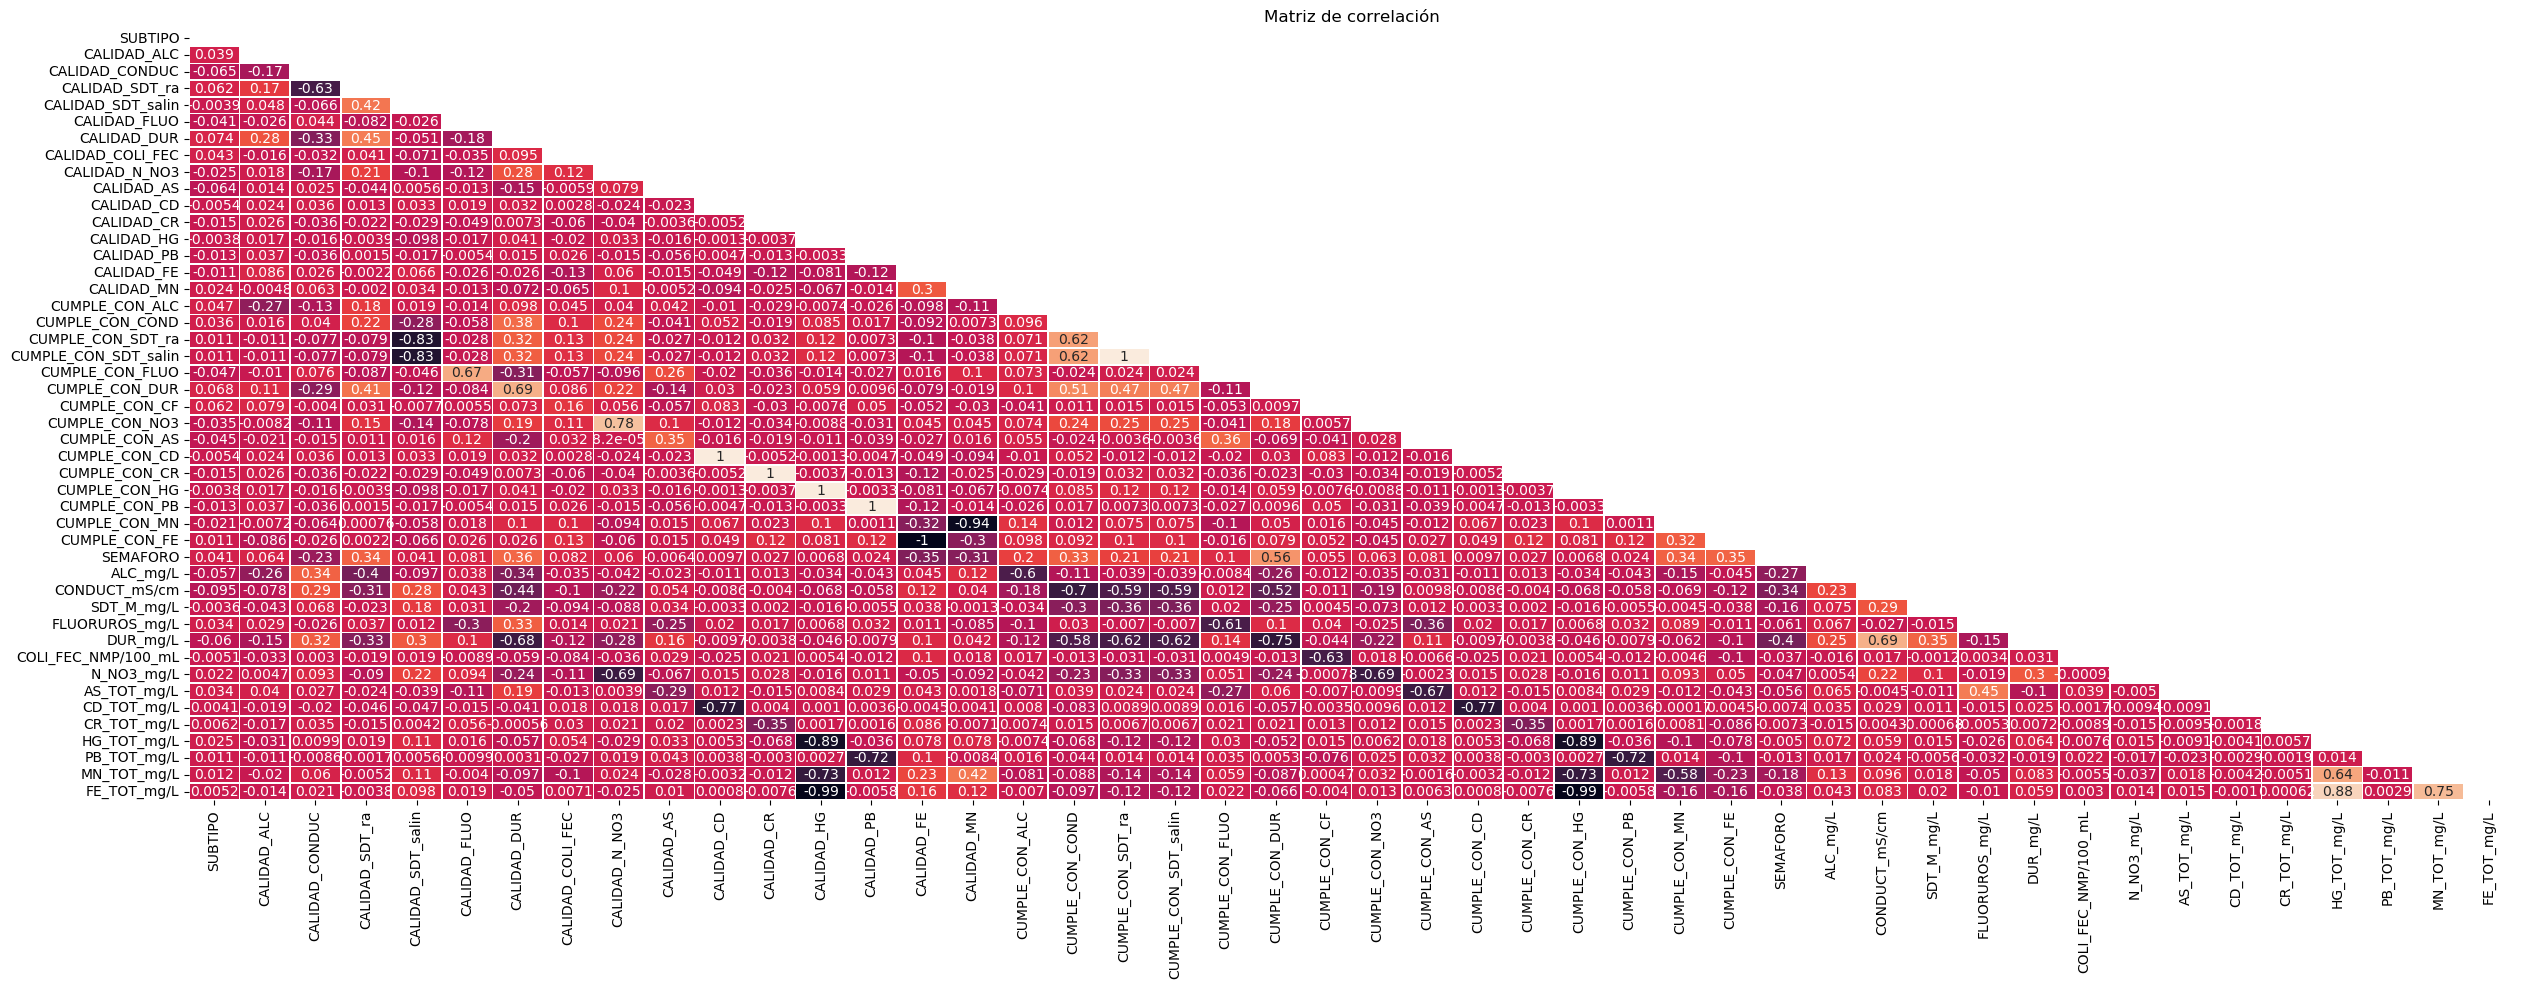

In [ ]:
corrmatrix = df[np.append(variables_categoricas, variables_float)].corr()
mask = np.zeros_like(corrmatrix)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(30,10))
plt.title('Matriz de correlación')
sns.heatmap(corrmatrix, mask=mask, annot=True, cmap="rocket", linewidth=.5, cbar=False)
plt.show()

### 3. Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

In [ ]:

sns.pairplot(df[np.append(variables_categoricas, variables_float)],size=4,kind='scatter')

c:\Users\erick\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [ ]:
# Creamos los puntos de geolocalizacion en una columna llamada Coordenadas
df["Coordinates"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordinates"] = df["Coordinates"].apply(Point)
df["Coordinates"]

0        POINT (-102.0221 22.20887)
1       POINT (-102.20075 21.99958)
2       POINT (-102.28801 22.36685)
3       POINT (-102.29449 22.18435)
4        POINT (-110.2448 23.45138)
                   ...             
1063     POINT (-99.54191 24.76036)
1064      POINT (-99.70099 24.7828)
1065     POINT (-99.82249 25.55197)
1066    POINT (-100.32683 24.80118)
1067     POINT (-100.73302 25.0938)
Name: Coordinates, Length: 1054, dtype: object

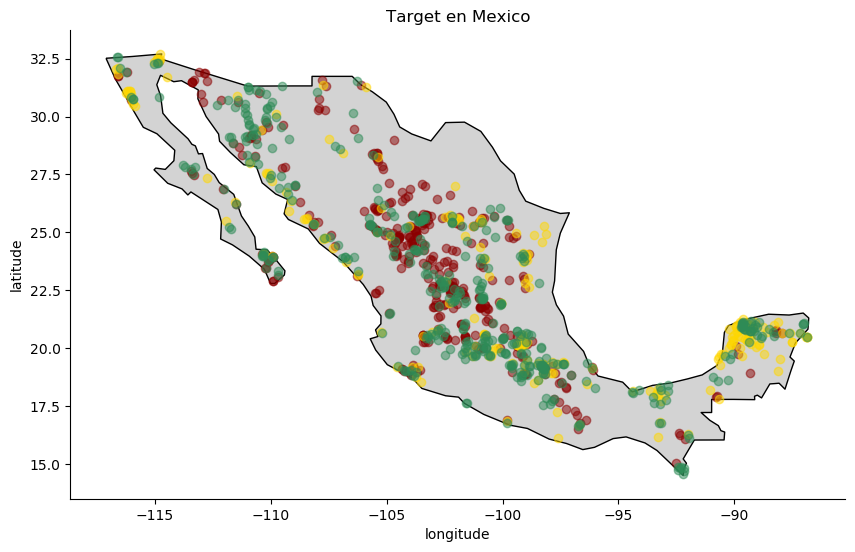

In [ ]:
# Creamos un nuevo GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")

# Graficamos los clusters
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='lightgrey') #Aqui traemos el mapa de México

amarillo = gdf[gdf.SEMAFORO == 0]
rojos = gdf[gdf.SEMAFORO == 1]
verde = gdf[gdf.SEMAFORO == 2]

rojos.plot(ax=gax, color='darkred', alpha = 0.5)
amarillo.plot(ax=gax, color='gold', alpha = 0.5)
verde.plot(ax=gax, color='seagreen', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)



### 4. Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

Kmeans:  [KMeans(n_clusters=1), KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=4), KMeans(n_clusters=5), KMeans(n_clusters=6), KMeans(n_clusters=7), KMeans(), KMeans(n_clusters=9)]

Scores:  [-63046.35020690207, -28313.603015773675, -12866.063708953237, -8068.008601745902, -6389.805568486054, -5096.750282689534, -4246.251708075484, -3537.0253173876445, -2769.300408007919]


Text(0.5, 1.0, 'Elbow Curve')

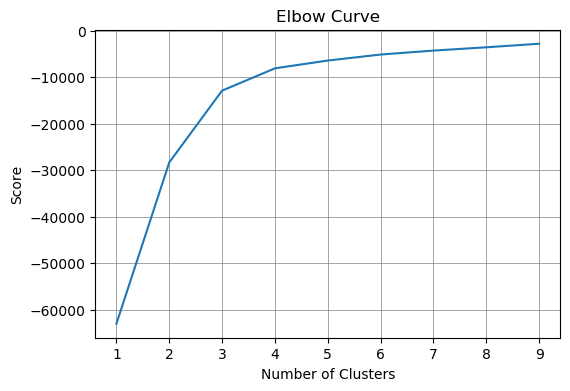

In [ ]:
#Obtenemos numero de cluster optimo
latlong=df[["LONGITUD","LATITUD"]]
X = latlong

# Elegimos un rango de puntos que seran evaluados
nclusters = range(1, 10)

# Modelos KMeans con diferentes Clusters
kmeans = [KMeans(n_clusters=i) for i in nclusters]
print("Kmeans: ", kmeans)

# Generamos un score para cada cluster con los datos de entrada X
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
print("\nScores: ", score)

# Grafica de curvatura codo
plt.figure(figsize=(6, 4)) 
plt.plot(nclusters,score)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

In [ ]:
# Creamos los clusters
kmeans = KMeans(n_clusters=3)

# Entrenamos el modelo
kmeans.fit(X)

# Predecimos el modelo
yhat = kmeans.predict(X)

# Obtenemos los Centroides
centroides = kmeans.cluster_centers_
print("Los centros de klusters son: ",centroides) 


Los centros de klusters son:  [[-101.71558109   22.27162356]
 [-110.74089614   28.42037512]
 [ -90.69843377   19.47516461]]


In [ ]:
df["CLUSTER"] = yhat
df["CLUSTER"]

0       0
1       0
2       0
3       0
4       1
       ..
1063    0
1064    0
1065    0
1066    0
1067    0
Name: CLUSTER, Length: 1054, dtype: int32

In [ ]:
# Agrupamos las cordenas en una sola columna para graficar corrctamente
cordenadas = pd.DataFrame(centroides)
cordenadas["Coordenadas"] = list(zip(cordenadas[0], cordenadas[1]))
cordenadas["Coordenadas"] = cordenadas["Coordenadas"].apply(Point)

# Convertimos el mapa a uno de tipo GeoDataFrame
geopanda_df= gpd.GeoDataFrame(cordenadas, geometry="Coordenadas")
geopanda_df

0          1                  Coordenadas
0 -101.715581  22.271624  POINT (-101.71558 22.27162)
1 -110.740896  28.420375  POINT (-110.74090 28.42038)
2  -90.698434  19.475165   POINT (-90.69843 19.47516)

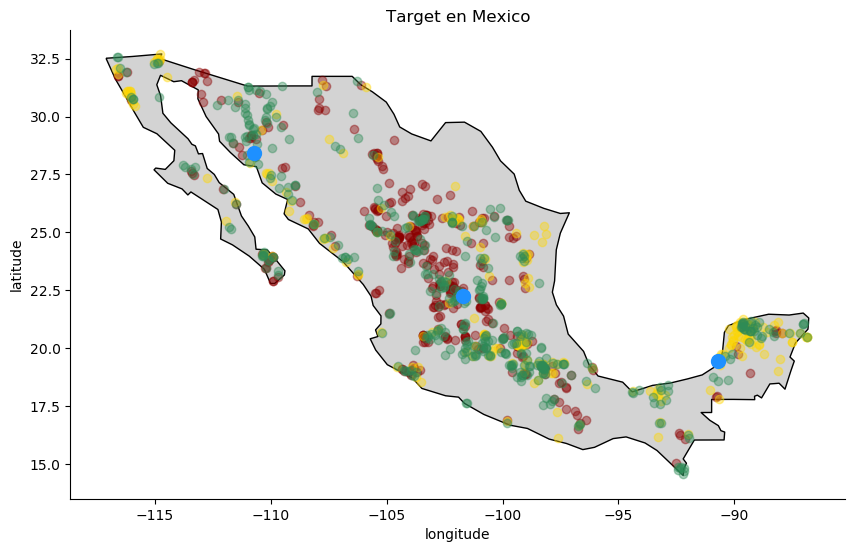

In [ ]:
# Creamos un nuevo GeoDataFrame

# Graficamos los clusters
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='lightgrey') #Aqui traemos el mapa de México

rojos.plot(ax=gax, color='darkred', alpha = 0.4)
amarillo.plot(ax=gax, color='gold', alpha = 0.4)
verde.plot(ax=gax, color='seagreen', alpha = 0.4)

cluster1 = gdf[gdf.CLUSTER == 0]
cluster2 = gdf[gdf.CLUSTER == 1]
cluster3 = gdf[gdf.CLUSTER == 2]
#cluster1.plot(ax=gax, color='red', alpha = 0.5)
#cluster2.plot(ax=gax, color='yellow', alpha = 0.5)
#cluster3.plot(ax=gax, color='blue', alpha = 0.5)

geopanda_df.plot(ax=gax, color='dodgerblue', alpha = 1, markersize = 100) #Aqui grafica los datos de nuestro dataset 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)